# Projeto

### Enunciado

Neste módulo, vamos fazer um estudo de caso para práticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo com de 4 a 5 pessoas e seguir o passo a passo abaixo.

- Escolher um Dataset, valide com o professor se o dataset escolhido é valido :heavy_check_mark:

- Definir uma aplicação de Machine Learning para aplicar ao Dataset

   a. Esta aplicação pode ser uma regressão ou uma classificação para predizer um target a sua escolha.

- Fazer a análise com pelo menos 2 estimadores, comparando os resultados

- Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

- Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção, resolvendo o problema formulado no início

A avaliação sera feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos. Pede-se que cada grupo preencha na planilha o dataset escolhido.

### Dataset Columns:

- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sleep.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.shape

(374, 13)

In [38]:
df["Gender"].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [37]:
df_limpo['Gender'] = df_limpo['Gender'].map({'Male':0, 'Female': 1})

In [11]:
df["Occupation"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [12]:
import seaborn as sns
import matplotlib as plt

<Axes: xlabel='Sleep Duration', ylabel='Count'>

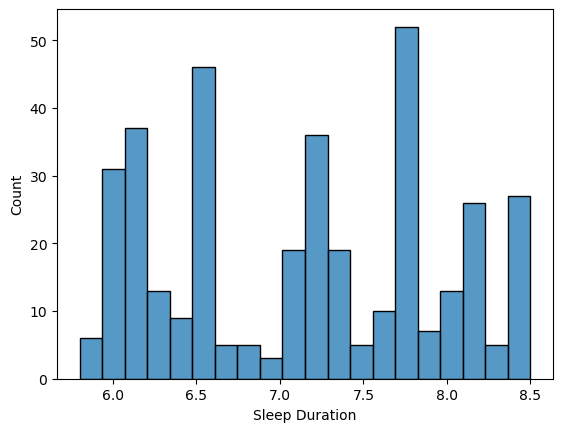

In [17]:
sns.histplot(df, x="Sleep Duration", bins=20)

<Axes: xlabel='Quality of Sleep', ylabel='Count'>

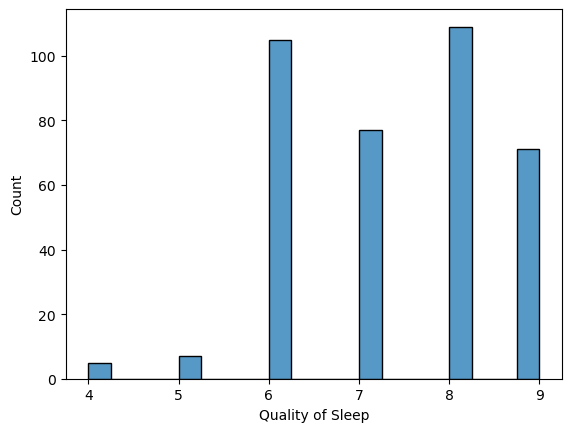

In [18]:
sns.histplot(df, x="Quality of Sleep", bins=20)

# muito desbalanceado

<Axes: xlabel='Quality of Sleep'>

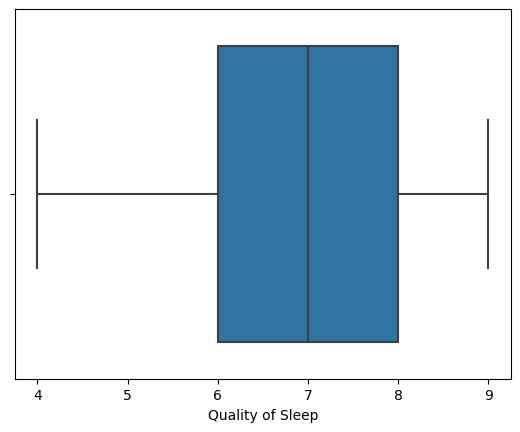

In [21]:
sns.boxplot(df, x="Quality of Sleep")

<Axes: xlabel='Physical Activity Level', ylabel='Count'>

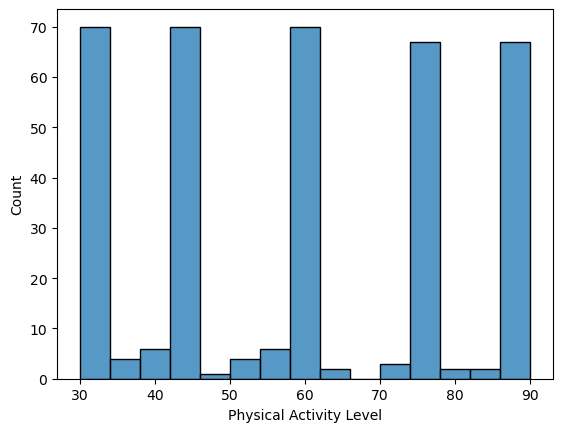

In [20]:
sns.histplot(df, x="Physical Activity Level", bins=15)

<Axes: xlabel='Stress Level', ylabel='Count'>

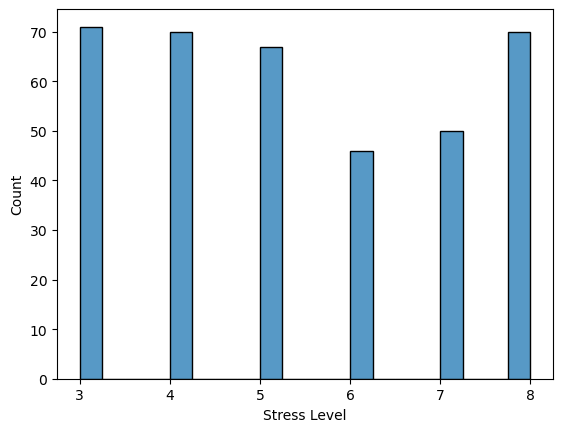

In [22]:
sns.histplot(df, x="Stress Level", bins=20)

<Axes: xlabel='BMI Category', ylabel='Count'>

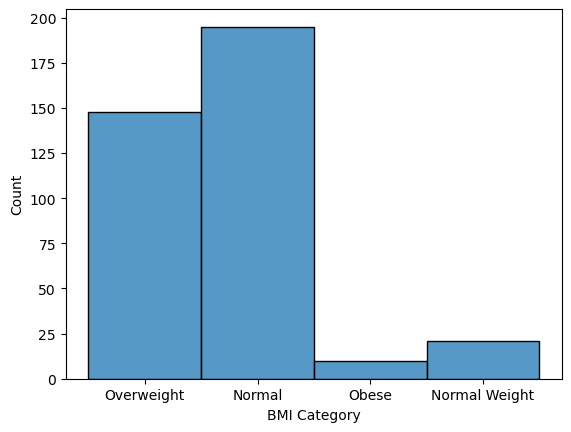

In [23]:
sns.histplot(df, x="BMI Category", bins=20)

In [28]:
df_limpo = df.copy(deep=True)

In [29]:
df_limpo['BMI Category'] = df_limpo['BMI Category'].map({'Normal Weight': 'Normal', 'Normal':'Normal', 'Obese': 'Obese', 'Overweight': 'Overweight'})

<Axes: xlabel='BMI Category', ylabel='Count'>

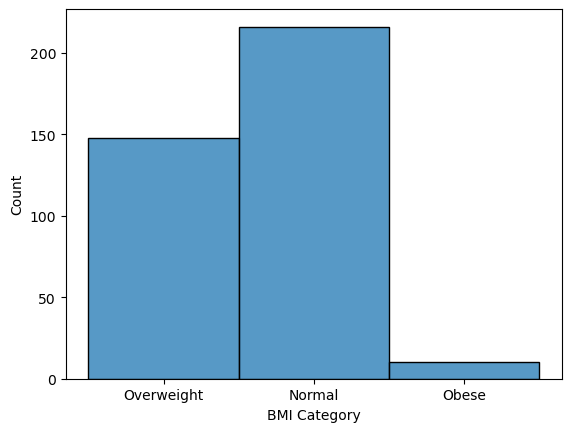

In [30]:
sns.histplot(df_limpo, x="BMI Category", bins=20)

<Axes: xlabel='Heart Rate', ylabel='Count'>

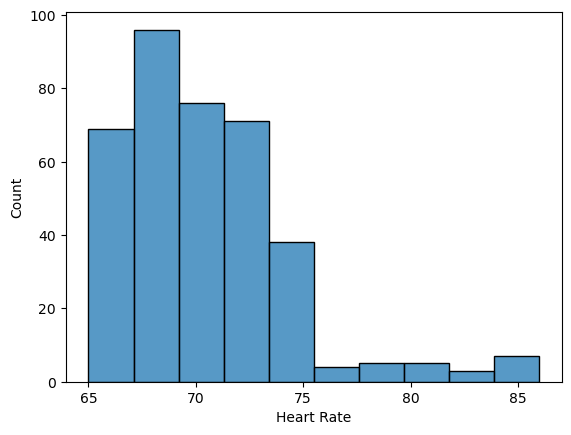

In [32]:
sns.histplot(df, x="Heart Rate", bins=10)

<Axes: xlabel='Daily Steps', ylabel='Count'>

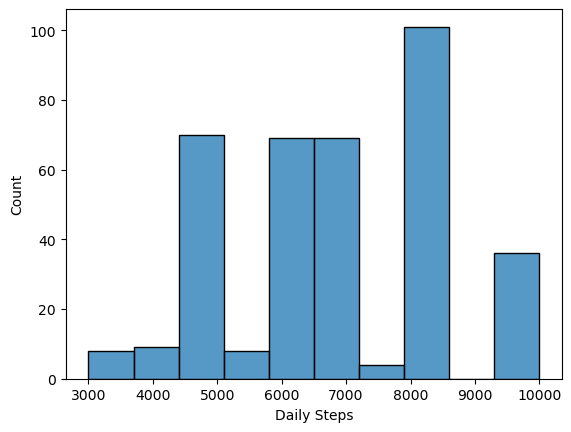

In [35]:
sns.histplot(df, x="Daily Steps", bins=10)


In [ ]:
# calculo da pressão arterial media (PAM):
# (sistolica + 2x diastolica)/3 = PAM 

#normal = abaixo de 90
#elevado = entre 90 e 92
#hipertensão 1 = entre 92 e 96 
#hipertensão 2 = acima de 96

In [54]:
#tirando os dados da pressão sanguínea 
sistolica = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
diastolica = df['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [55]:
type(sistolica)

pandas.core.series.Series

In [60]:
#alterando o tipo dos dados de string pra int
sistolica = sistolica.apply(lambda x: int(x))
diastolica = diastolica.apply(lambda x: int(x))

In [61]:
pam = []
for i in range(len(sistolica)):
    x = (sistolica[i] + (2*diastolica[i]))/3
    pam.append(x)

In [62]:
pam

[97.33333333333333,
 95.0,
 95.0,
 106.66666666666667,
 106.66666666666667,
 106.66666666666667,
 106.66666666666667,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 102.0,
 93.33333333333333,
 102.0,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 100.66666666666667,
 100.66666666666667,
 89.66666666666667,
 95.0,
 93.33333333333333,
 95.0,
 95.0,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 93.33333333333333,
 95.0,
 93.33333333333333,
 95.0,
 95.0,
 9

In [65]:
df_limpo["Mean Arterial Pressure"]= pam

<Axes: xlabel='Sleep Disorder', ylabel='Count'>

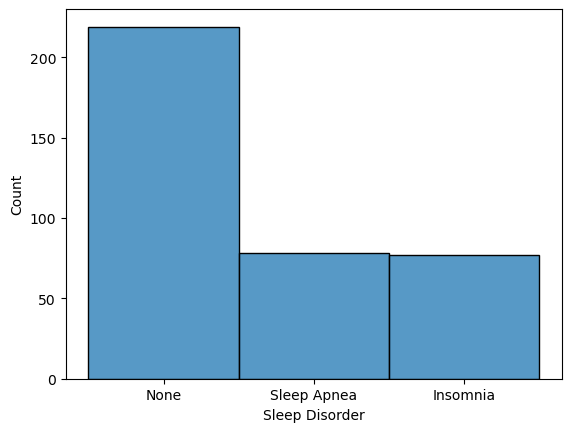

In [36]:
sns.histplot(df, x="Sleep Disorder", bins=20)

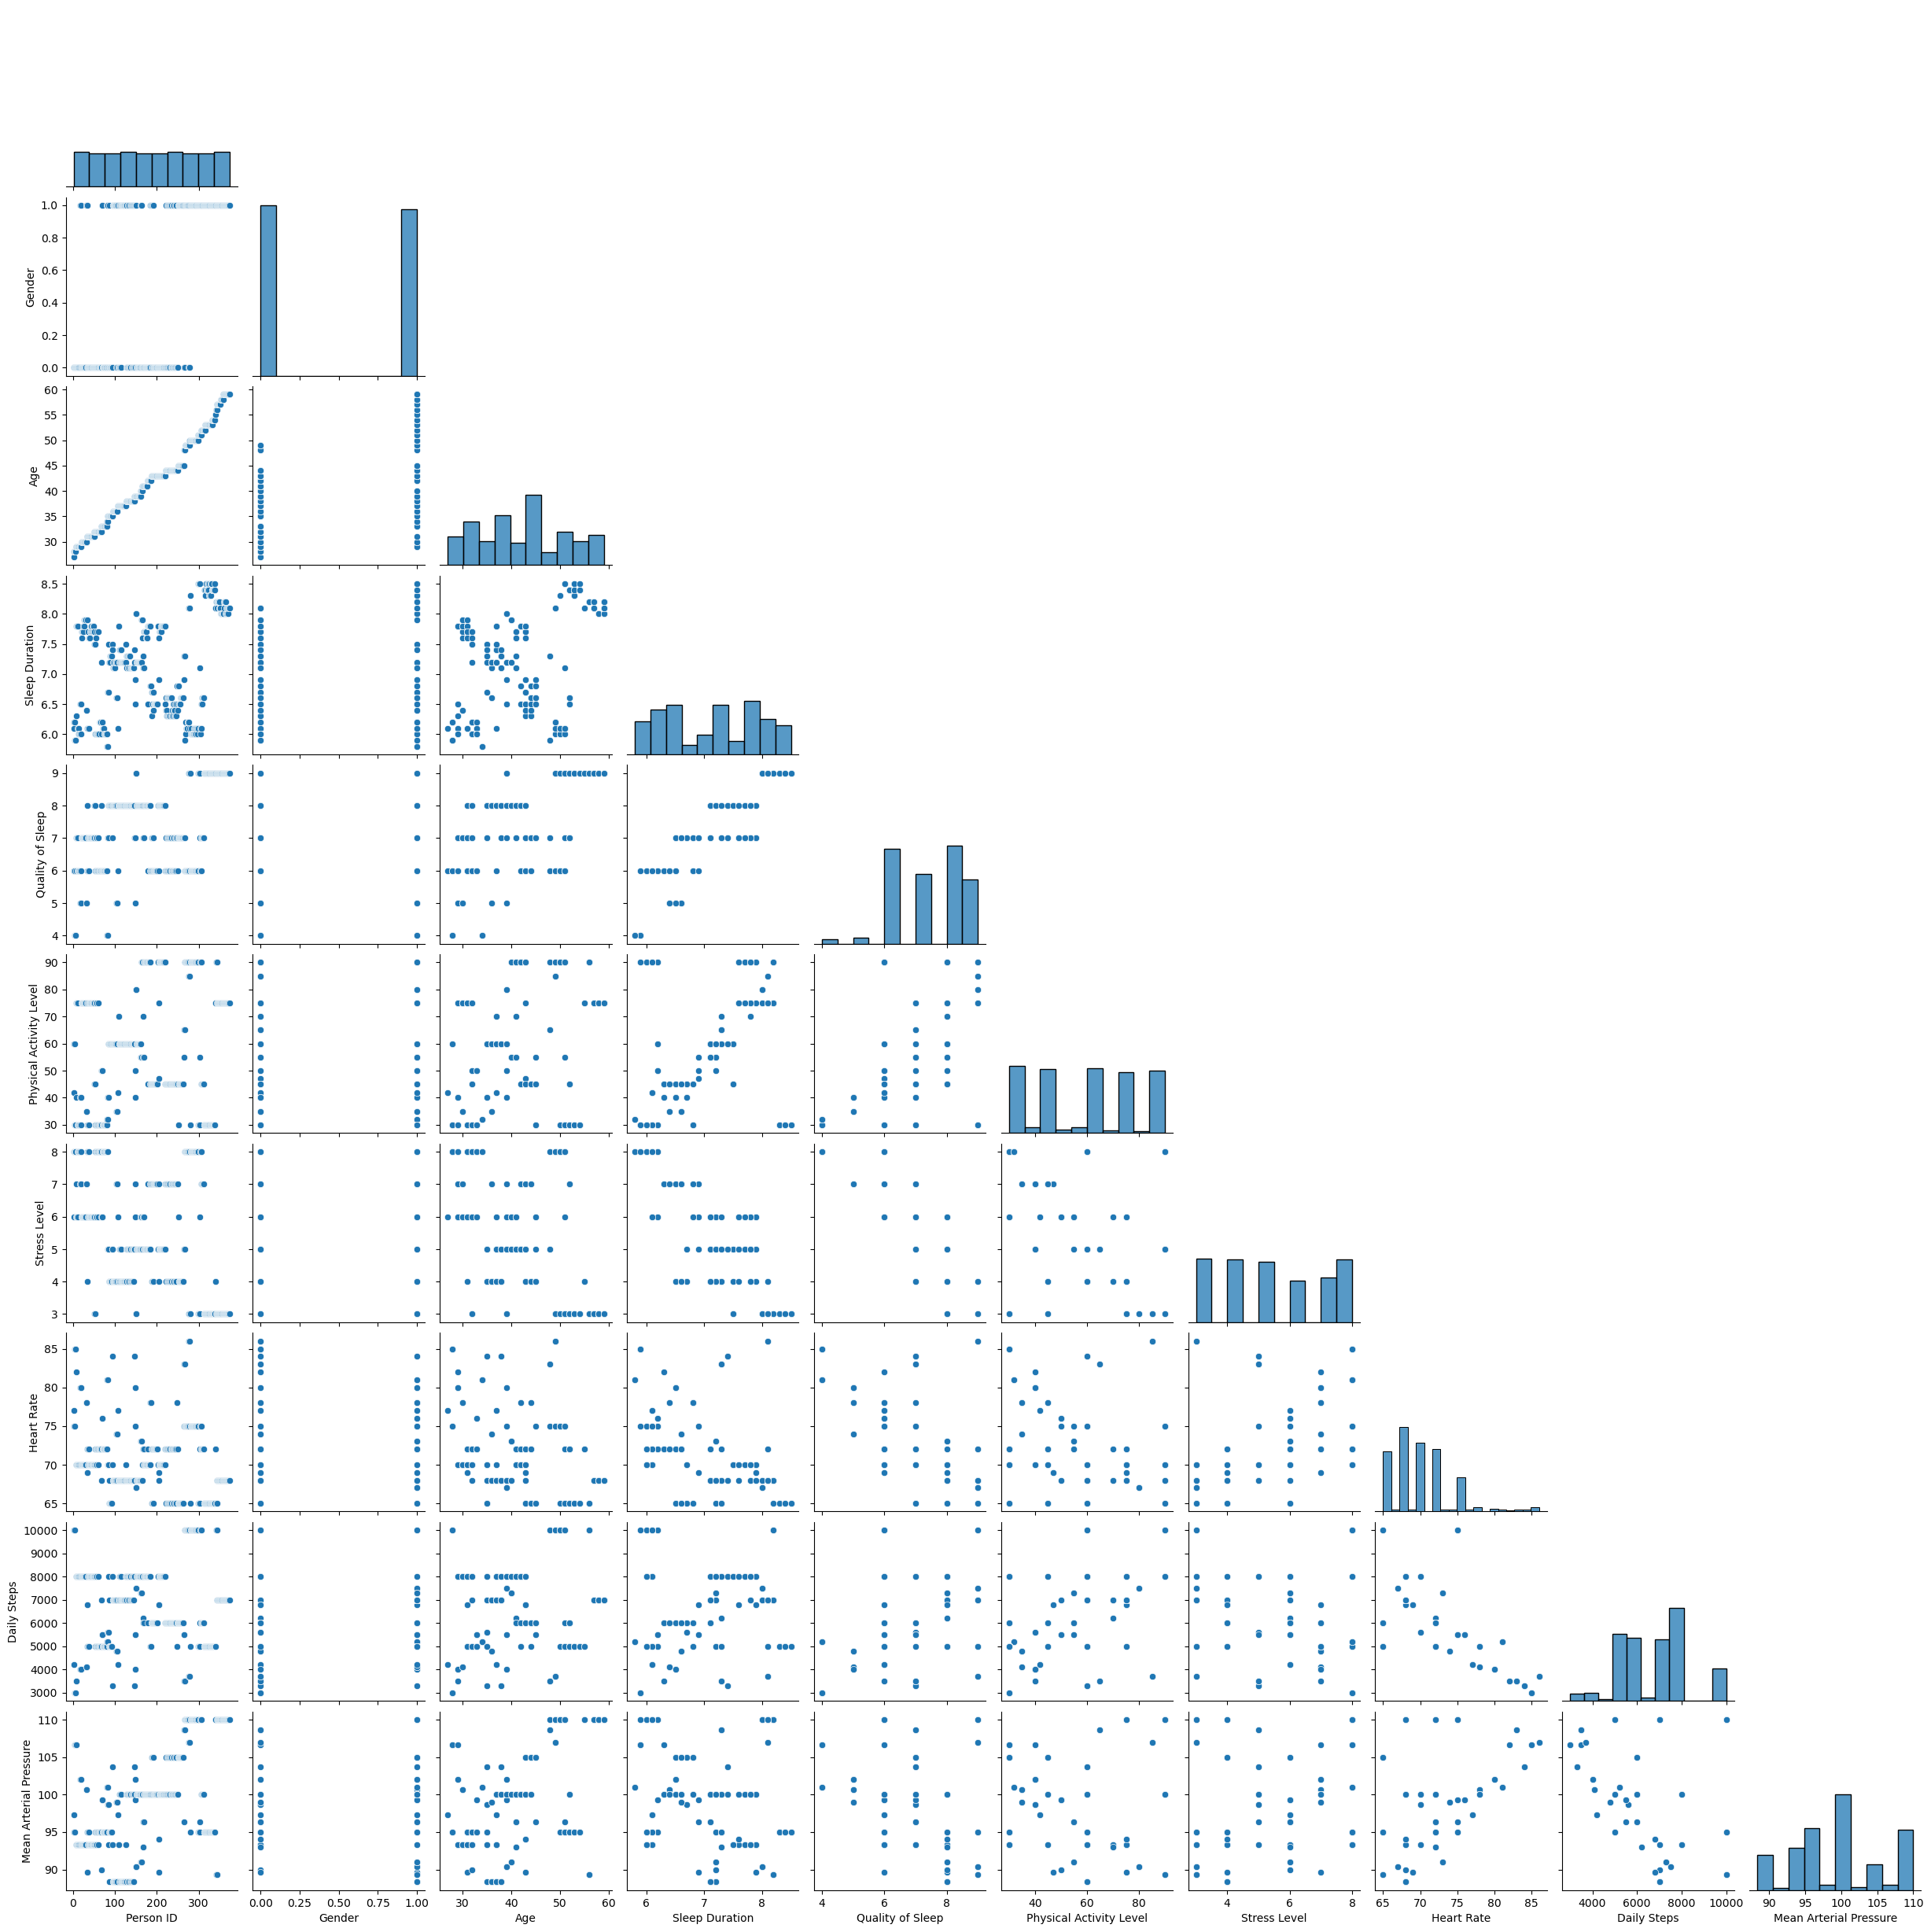

In [67]:
sns.pairplot(df_limpo, corner=True)